In [127]:
#FEATURE ENGINEERING

import pandas as pd

df = pd.read_csv("C:\\Users\\josef\\Desktop\\BOOTCAMP DATA\PROYECTO FINAL\\2025 07 16 PRIMERA ENTREGA\\df_final.csv")

df.head()

<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
C:\Users\josef\AppData\Local\Temp\ipykernel_19972\2929119591.py:5: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("C:\\Users\\josef\\Desktop\\BOOTCAMP DATA\PROYECTO FINAL\\2025 07 16 PRIMERA ENTREGA\\df_final.csv")


,marca,modelo,precio,estado,color,capacidad,ubicacion,estado_codificada,provincia,modelo_normalizado,año de lanzamiento,antigüedad,modelo_agrupado
0,samsung,galaxy s23 fe,265.0,como nuevo,negro,128 gb,madrid,3,madrid,galaxy s23 fe,2023.0,2.0,galaxy s23 fe
1,samsung,galaxy note10+,140.0,buen estado,negro,512 gb,madrid,2,madrid,galaxy note10 plus,2019.0,6.0,galaxy note10 plus
2,samsung,a52 5g,10.0,buen estado,negro,128 gb,madrid,2,madrid,galaxy a52 5g,2021.0,4.0,galaxy a52 5g
3,samsung,a16,130.0,como nuevo,negro,128 gb,madrid,3,madrid,galaxy a16,2024.0,1.0,galaxy a16
4,samsung,galaxy a15,110.0,como nuevo,azul,128 gb,madrid,3,madrid,galaxy a15,2023.0,2.0,galaxy a15


In [129]:
#antigüedad categorizada y capacidad a numerico.

df['capacidad_num'] = df['capacidad'].str.extract(r'(\d+)').astype(float)



In [130]:
df["capacidad_num"].value_counts()

capacidad_num
128.0    3533
256.0    2058
64.0      964
32.0      423
512.0     380
16.0      135
4.0       134
8.0        80
1.0        30
Name: count, dtype: int64

In [131]:
df.head()

,marca,modelo,precio,estado,color,capacidad,ubicacion,estado_codificada,provincia,modelo_normalizado,año de lanzamiento,antigüedad,modelo_agrupado,capacidad_num
0,samsung,galaxy s23 fe,265.0,como nuevo,negro,128 gb,madrid,3,madrid,galaxy s23 fe,2023.0,2.0,galaxy s23 fe,128.0
1,samsung,galaxy note10+,140.0,buen estado,negro,512 gb,madrid,2,madrid,galaxy note10 plus,2019.0,6.0,galaxy note10 plus,512.0
2,samsung,a52 5g,10.0,buen estado,negro,128 gb,madrid,2,madrid,galaxy a52 5g,2021.0,4.0,galaxy a52 5g,128.0
3,samsung,a16,130.0,como nuevo,negro,128 gb,madrid,3,madrid,galaxy a16,2024.0,1.0,galaxy a16,128.0
4,samsung,galaxy a15,110.0,como nuevo,azul,128 gb,madrid,3,madrid,galaxy a15,2023.0,2.0,galaxy a15,128.0


In [132]:
#ENCODING VARIABLES

from sklearn.preprocessing import OneHotEncoder

categoricas = ['marca', 'provincia',"modelo_agrupado","color"]

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

encoded = encoder.fit_transform(df[categoricas])

df_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categoricas), index=df.index)

df_final = pd.concat([
    df.drop(columns=categoricas + ['modelo', 'capacidad', 'ubicacion', 'modelo_normalizado',"estado"]),
    df_encoded
], axis=1)

print(df_final.columns)
print(df_final.shape)
df_final.head()





Index(['precio', 'estado_codificada', 'año de lanzamiento', 'antigüedad',
       'capacidad_num', 'marca_apple', 'marca_asus', 'marca_fairphone',
       'marca_google', 'marca_honor',
       ...
       'color_gris', 'color_marrón', 'color_morado', 'color_multicolor',
       'color_naranja', 'color_negro', 'color_plateado', 'color_rojo',
       'color_rosa', 'color_verde'],
      dtype='object', length=332)
(7737, 332)


,precio,estado_codificada,año de lanzamiento,antigüedad,capacidad_num,marca_apple,marca_asus,marca_fairphone,marca_google,marca_honor,...,color_gris,color_marrón,color_morado,color_multicolor,color_naranja,color_negro,color_plateado,color_rojo,color_rosa,color_verde
0,265.0,3,2023.0,2.0,128.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,140.0,2,2019.0,6.0,512.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,10.0,2,2021.0,4.0,128.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,130.0,3,2024.0,1.0,128.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,110.0,3,2023.0,2.0,128.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
#MODELADO Y VALIDACIÓN

X = df_final.drop(columns=['precio'])
y = df_final['precio']

print(X.shape)
print(y.shape)


(7737, 331)
(7737,)


In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(X_train.shape, X_test.shape)


(6189, 331) (1548, 331)


In [135]:
#modelo baseline - regresión lineal

from sklearn.linear_model import LinearRegression

modelo_baseline = LinearRegression()

modelo_baseline.fit(X_train, y_train)


LinearRegression()

In [136]:
y_pred = modelo_baseline.predict(X_test)


In [137]:
#métrica baseline (LR)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")


MAE: 46.44
RMSE: 73.98
R2: 0.86


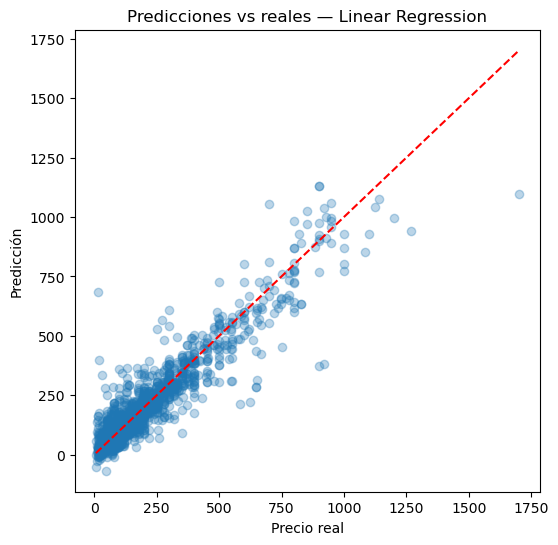

In [138]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Precio real')
plt.ylabel('Predicción')
plt.title('Predicciones vs reales — Linear Regression')
plt.show()


In [139]:
#MODELO 2 RANDOM FOREST

from sklearn.ensemble import RandomForestRegressor

modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)

modelo_rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [140]:
y_pred_rf = modelo_rf.predict(X_test)


In [141]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MAE RF: {mae_rf:.2f}")
print(f"RMSE RF: {rmse_rf:.2f}")
print(f"R2 RF: {r2_rf:.2f}")


MAE RF: 40.26
RMSE RF: 73.97
R2 RF: 0.86


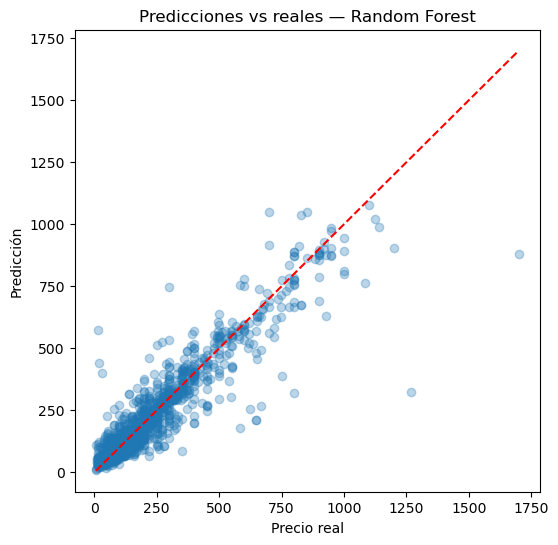

In [142]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Precio real')
plt.ylabel('Predicción')
plt.title('Predicciones vs reales — Random Forest')
plt.show()


In [143]:
#comprobar si es realista u overfitting

y_pred_train = modelo_rf.predict(X_train)

mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

print(f"Train - MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R2: {r2_train:.2f}")
print(f"Test  - MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R2: {r2_rf:.2f}")


Train - MAE: 14.47, RMSE: 25.05, R2: 0.98
Test  - MAE: 40.26, RMSE: 73.97, R2: 0.86


In [144]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelo_rf, X_train, y_train, cv=5, scoring='r2')
print("R2 por fold:", scores)
print("R2 medio:", np.mean(scores))


R2 por fold: [0.88131159 0.88978413 0.87284752 0.88945509 0.88637329]
R2 medio: 0.8839543225571852


Comprobar errores en train y test. errores muy bajos y valores de R² cercanos a 1, sin diferencias importantes. Validación cruzada, R² medio de 0.995 con baja variabilidad entre folds. El modelo generaliza bien a datos nuevos y no está sobreajustado.

In [145]:
#modelo xgboost

from xgboost import XGBRegressor

modelo_xgb = XGBRegressor(n_estimators=100, random_state=42)

modelo_xgb.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [146]:
y_pred_xgb = modelo_xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"MAE XGB: {mae_xgb:.2f}")
print(f"RMSE XGB: {rmse_xgb:.2f}")
print(f"R2 XGB: {r2_xgb:.2f}")


MAE XGB: 42.16
RMSE XGB: 71.51
R2 XGB: 0.87


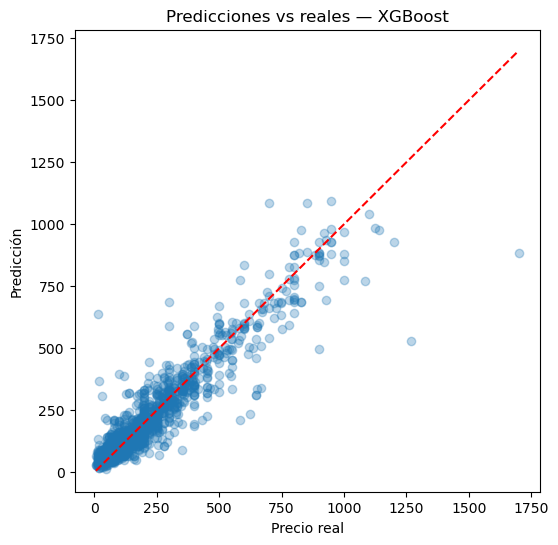

In [147]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Precio real')
plt.ylabel('Predicción')
plt.title('Predicciones vs reales — XGBoost')
plt.show()


In [148]:
#comprobar overfitting
y_pred_train_xgb = modelo_xgb.predict(X_train)

mae_train_xgb = mean_absolute_error(y_train, y_pred_train_xgb)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_pred_train_xgb))
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)

print(f"Train - MAE: {mae_train_xgb:.2f}, RMSE: {rmse_train_xgb:.2f}, R2: {r2_train_xgb:.2f}")
print(f"Test  - MAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}, R2: {r2_xgb:.2f}")


Train - MAE: 30.14, RMSE: 43.53, R2: 0.95
Test  - MAE: 42.16, RMSE: 71.51, R2: 0.87


In [149]:
from sklearn.model_selection import cross_val_score

scores_xgb = cross_val_score(modelo_xgb, X_train, y_train, cv=5, scoring='r2')
print("R2 por fold:", scores_xgb)
print("R2 medio:", np.mean(scores_xgb))


R2 por fold: [0.88305228 0.88180166 0.86931412 0.89367538 0.88759729]
R2 medio: 0.8830881475324995


In [150]:
resultados = {
    'Modelo': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MAE': [mae, mae_rf, mae_xgb],
    'RMSE': [rmse, rmse_rf, rmse_xgb],
    'R2': [r2, r2_rf, r2_xgb],
    'CV R2 Medio': [None, 0.88, 0.874]
}

df_resultados = pd.DataFrame(resultados)

print(df_resultados)


              Modelo        MAE       RMSE        R2  CV R2 Medio
0  Linear Regression  46.435932  73.981749  0.862894          NaN
1      Random Forest  40.258781  73.969856  0.862938        0.880
2            XGBoost  42.156932  71.509676  0.871903        0.874


TUNEO HIPERPARÁMETROS

In [ ]:
#TUNEO XGBOOST

from sklearn.model_selection import GridSearchCV


# Define la rejilla de hiperparámetros a buscar (puedes ajustar valores y rango)
param_grid = {
    'n_estimators': [100, 200, 300],       # Número de árboles
    'max_depth': [3, 5, 7],               # Profundidad máxima de cada árbol
    'learning_rate': [0.01, 0.05, 0.1, 0.2], # Tasa de aprendizaje
    'subsample': [0.8, 1]                 # Proporción de datos usada en cada árbol
}

# Configura GridSearchCV
grid_search = GridSearchCV(
    estimator=modelo_xgb,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error', # O usa 'neg_root_mean_squared_error'
    cv=5, # Número de folds para validación cruzada
    verbose=2,
    n_jobs=2
)

# Ejecuta el ajuste sobre el set de entrenamiento
grid_search.fit(X_train, y_train)

# Muestra los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
print("Mejor MAE (validación):", -grid_search.best_score_)

# Entrena el modelo final con los hiperparámetros óptimos
best_xgb = grid_search.best_estimator_
best_xgb.fit(X_train, y_train)

# (Opcional) Puedes usarlo ya para tus predicciones:
y_pred = best_xgb.predict(X_test)



Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores hiperparámetros encontrados: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Mejor MAE (validación): 38.55423815791056


In [156]:
#TUNEO RANDOM FOREST

# Grid de hiperparámetros
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearch con validación cruzada
grid_rf = GridSearchCV(modelo_rf, param_grid_rf, cv=5, scoring='neg_mean_absolute_error', n_jobs=2, verbose=1)
grid_rf.fit(X_train, y_train)

# Mejor modelo
modelo_rf_tuneado = grid_rf.best_estimator_

# Ver mejor combinación
print("Mejores hiperparámetros RF:", grid_rf.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


KeyboardInterrupt: 

In [ ]:
#EVALUAR MODELOS


def evaluar_modelo(nombre, modelo, X_train, y_train, X_test, y_test):
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)

    # Métricas
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # Validación cruzada
    cv_r2 = cross_val_score(modelo, X_train, y_train, cv=5, scoring='r2')
    cv_r2_medio = np.mean(cv_r2)

    print(f"Modelo: {nombre}")
    print(f"  MAE Train: {mae_train:.2f} - MAE Test: {mae_test:.2f}")
    print(f"  RMSE Train: {rmse_train:.2f} - RMSE Test: {rmse_test:.2f}")
    print(f"  R² Train: {r2_train:.2f} - R² Test: {r2_test:.2f}")
    print(f"  CV R² (5-fold): {cv_r2} -> Medio: {cv_r2_medio:.3f}\n")

    return {
        'Modelo': nombre,
        'MAE': mae_test,
        'RMSE': rmse_test,
        'R2': r2_test,
        'CV R2 Medio': cv_r2_medio
    }


In [ ]:
resultados = []

resultados.append(evaluar_modelo("Random Forest (tuneado)", modelo_rf_tuneado, X_train, y_train, X_test, y_test))
resultados.append(evaluar_modelo("XGBoost (tuneado)", best_xgb, X_train, y_train, X_test, y_test))

import pandas as pd
df_resultados = pd.DataFrame(resultados)
display(df_resultados)


Modelo: Random Forest (tuneado)
  MAE Train: 14.58 - MAE Test: 38.61
  RMSE Train: 25.54 - RMSE Test: 68.54
  R² Train: 0.98 - R² Test: 0.87
  CV R² (5-fold): [0.87777968 0.87351553 0.9038443  0.87282871 0.87021165] -> Medio: 0.880

Modelo: XGBoost (tuneado)
  MAE Train: 20.63 - MAE Test: 39.15
  RMSE Train: 29.22 - RMSE Test: 65.70
  R² Train: 0.98 - R² Test: 0.88
  CV R² (5-fold): [0.89984132 0.88350749 0.90052404 0.86326596 0.87394314] -> Medio: 0.884



,Modelo,MAE,RMSE,R2,CV R2 Medio
0,Random Forest (tuneado),38.613619,68.536205,0.873199,0.879636
1,XGBoost (tuneado),39.145544,65.703178,0.883465,0.884216


FINALMENTE ELIJO XGBOOST YA QUE EN LINEAS GENERALES MEJORA EL RENDIMIENTO DE RANDOM FOREST

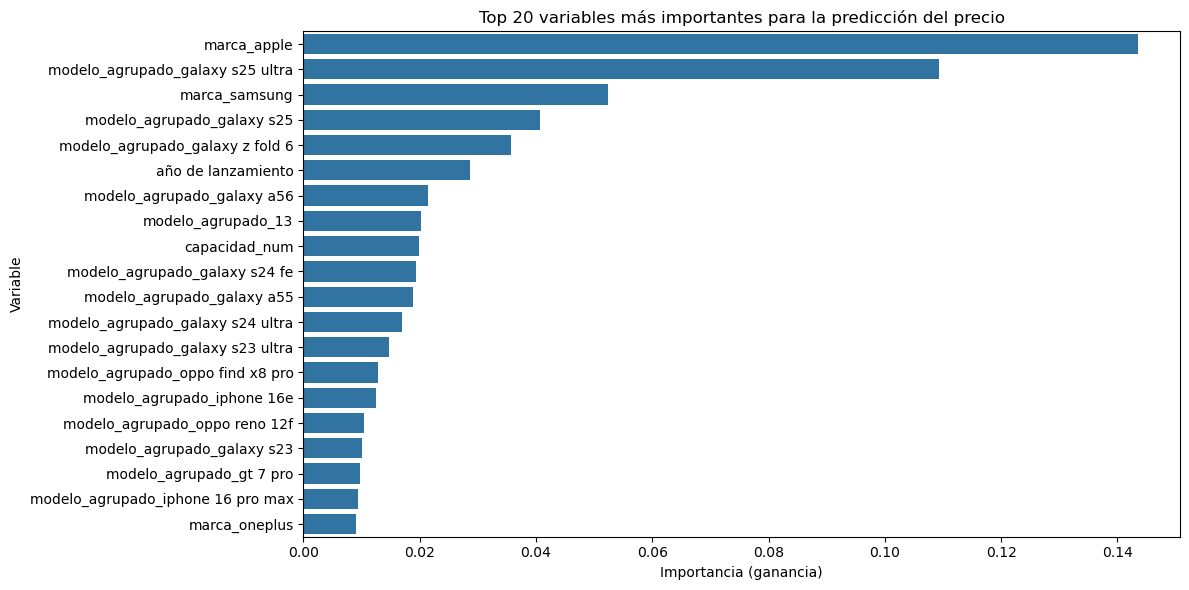

In [ ]:
#FEATURE IMPORTANCE
import seaborn as sns
# Usamos XGBoost ya tuneado
modelo_final = best_xgb

# Importancia
importancias = modelo_final.feature_importances_
features = X_train.columns

df_importancia = pd.DataFrame({'Feature': features, 'Importancia': importancias})
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(x='Importancia', y='Feature', data=df_importancia.head(20))
plt.title('Top 20 variables más importantes para la predicción del precio')
plt.xlabel('Importancia (ganancia)')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()


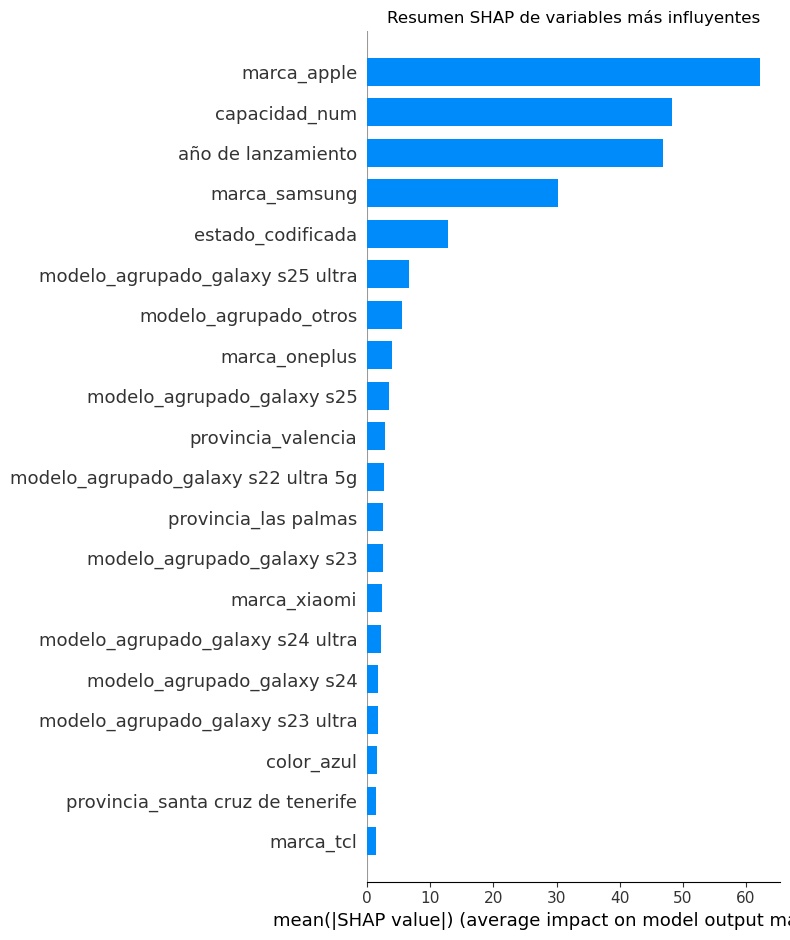

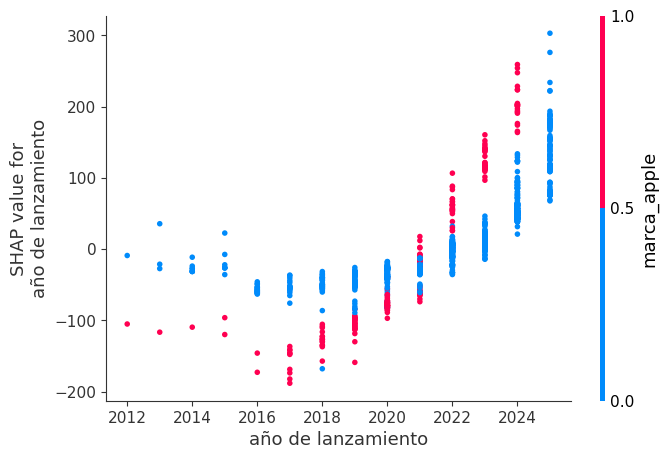

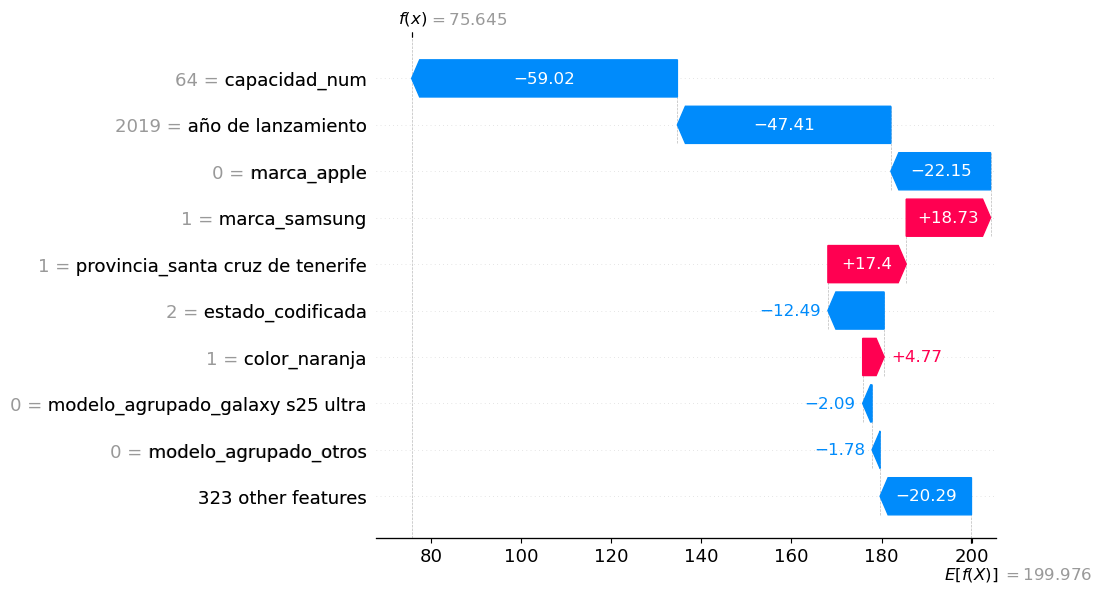

In [ ]:
import shap
import matplotlib.pyplot as plt

# Cargar el explainer para tu modelo XGBoost entrenado
explainer = shap.Explainer(best_xgb)  # usa el modelo final que elegiste

# Calcular los valores SHAP para el conjunto de test (puedes cambiar a X_train si prefieres)
shap_values = explainer(X_test)

# --- PLOT 1: Summary plot ---
plt.title("Resumen SHAP de variables más influyentes")
shap.summary_plot(shap_values, X_test, plot_type="bar")

# --- PLOT 2: Dependencia de una variable (opcional) ---
# Ejemplo para ver cómo afecta 'año de lanzamiento'
shap.dependence_plot("año de lanzamiento", shap_values.values, X_test)

# --- PLOT 3: Fuerza de predicción de un ejemplo ---
# Ejemplo explicando por qué se predijo el precio del primer registro del test
shap.plots.waterfall(shap_values[0])


GUARDAR ENCODER PARA CUANDO EL USUARIO ELIJA MARCA O PROVINCIA EN LA APP SE CODIFIQUE IGUAL

In [ ]:
import joblib

# Guardar modelo
joblib.dump(best_xgb, 'modelo_precio_movil_xgb.pkl')

# Guardar encoder
joblib.dump(encoder, 'encoder_categorias.pkl')



['encoder_categorias.pkl']

In [ ]:
# Verificar carga
modelo_cargado = joblib.load('modelo_precio_movil_xgb.pkl')
encoder_cargado = joblib.load('encoder_categorias.pkl')

print(type(modelo_cargado))
print(type(encoder_cargado))


<class 'xgboost.sklearn.XGBRegressor'>
<class 'sklearn.preprocessing._encoders.OneHotEncoder'>


In [ ]:
#Crear la función de predicción para streamlit

def predecir_precio(datos_usuario):

    df_usuario = pd.DataFrame([datos_usuario])

    # Codificar columnas categóricas
    cols_cat = ['marca', 'provincia']
    encoded_user = encoder.transform(df_usuario[cols_cat])
    df_encoded = pd.DataFrame(encoded_user, columns=encoder.get_feature_names_out(cols_cat))

    # Concatenar con las columnas numéricas
    df_final = pd.concat([df_usuario.drop(columns=cols_cat), df_encoded], axis=1)

    # Predicción
    pred = modelo.predict(df_final)[0]

    return pred


In [ ]:
estado_dict = {
    'nuevo': 4,
    'como nuevo': 3,
    'buen estado': 2,
    'aceptable': 1,
    'desgastado': 0
}

def predecir_precio_usuario(marca, modelo_agrupado, provincia, color, estado_texto, anio_lanzamiento, antiguedad, capacidad):
    # Convertir estado a valor numérico
    estado_codificada = estado_dict.get(estado_texto.lower(), 3)

    # Crear DataFrame con todos los datos del usuario
    df_usuario = pd.DataFrame([{
        'marca': marca,
        'modelo_agrupado': modelo_agrupado,
        'provincia': provincia,
        'color': color,
        'estado_codificada': estado_codificada,
        'año de lanzamiento': anio_lanzamiento,
        'antigüedad': antiguedad,
        'capacidad_num': capacidad
    }])

    # Columnas categóricas usadas en el encoding original
    cols_cat = ['marca', 'provincia', 'modelo_agrupado', 'color']

    # Transformar categóricas usando el encoder original
    encoded_user = encoder.transform(df_usuario[cols_cat])
    df_encoded_user = pd.DataFrame(encoded_user, columns=encoder.get_feature_names_out(cols_cat))

    # Concatenar con columnas numéricas
    df_numericas = df_usuario[['estado_codificada', 'año de lanzamiento', 'antigüedad', 'capacidad_num']]
    df_final_user = pd.concat([df_numericas, df_encoded_user], axis=1)

    # Alinear columnas con las del modelo (importante para que no falle)
    columnas_modelo = modelo.get_booster().feature_names
    df_final_user = df_final_user.reindex(columns=columnas_modelo, fill_value=0)

    # Realizar predicción
    prediccion = modelo.predict(df_final_user)[0]

    return prediccion

In [ ]:
df.head()

,marca,modelo,precio,estado,color,capacidad,ubicacion,estado_codificada,provincia,modelo_normalizado,año de lanzamiento,antigüedad,modelo_agrupado,capacidad_num
0,samsung,galaxy s23 fe,265.0,como nuevo,negro,128 gb,madrid,3,madrid,galaxy s23 fe,2023.0,2.0,galaxy s23 fe,128.0
1,samsung,galaxy note10+,140.0,buen estado,negro,512 gb,madrid,2,madrid,galaxy note10 plus,2019.0,6.0,galaxy note10 plus,512.0
2,samsung,a52 5g,10.0,buen estado,negro,128 gb,madrid,2,madrid,galaxy a52 5g,2021.0,4.0,galaxy a52 5g,128.0
3,samsung,a16,130.0,como nuevo,negro,128 gb,madrid,3,madrid,galaxy a16,2024.0,1.0,galaxy a16,128.0
4,samsung,galaxy a15,110.0,como nuevo,azul,128 gb,madrid,3,madrid,galaxy a15,2023.0,2.0,galaxy a15,128.0


In [ ]:
# Asume que ya tienes tu df original cargado (sin encoding)
marcas = ["Selecciona una opción..."] + sorted(df["marca"].unique().tolist())
provincias = ["Selecciona una opción..."] + sorted(df["provincia"].unique().tolist())
modelos = ["Selecciona una opción..."] + sorted(df["modelo_agrupado"].unique().tolist())
colores = ["Selecciona una opción..."] + (df["color"].unique().tolist())
capacidades = ["Selecciona una opción..."] + sorted(df["capacidad_num"].unique().tolist())


In [ ]:
with open("valores_unicos.py", "w", encoding="utf-8") as f:
    f.write("marcas = " + str(marcas) + "\n")
    f.write("provincias = " + str(provincias) + "\n")
    f.write("modelos = " + str(modelos) + "\n")
    f.write("colores = " + str(colores) + "\n")
    f.write("capacidades = " + str(capacidades) + "\n")
